# The Plan

## this workflow
Based on version 2 & 3 of this tree, I aim to made some improvements:
1. Reduce amount of species in the tree
2. Check species in the tree with literature on the 2ogd family
3. Replace guide sequences with Erbil's new set
4. Add more Azolla sequences to place in the tree
~~5. Plot RNAseq on the tree.~~
6. Add an outgroup

This latter improvement didn't work out well. 
Human and Yeast 2OGD sequences ended up all over the tree in saturated branches..


## data
Working with the data of version 4, minus the human and yeast sequences

In [2]:
grep '>' -c data/orthogroup_AtLDOX_AT4g22880_selection-v*_guide-v*.fasta

data/orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1.fasta:4301
data/orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v2.fasta:4364
data/orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v3.fasta:4372
data/orthogroup_AtLDOX_AT4g22880_selection-v1_selection-v1_guide-v3.fasta:119


: 1

Instead I removed some very short sequences during trimming.
This is not my preferred method, so I want to be more stringent here from the onset.

In [3]:
grep '>' -c data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_*-iqtree-content.fasta

data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v2_aligned-mafft_trim-gt4-seq95-res92_seqrm-iqtree-content.fasta:3927
data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v3_aligned-mafft_trim-gt4-iqtree-content.fasta:4113


: 1

Now let's look at the species IDs that are in this set (taken from workflow v2)

In [5]:
wc -l data/1kP_ids_v1.txt
cat   data/1kP_ids_v1.txt

86 data/1kP_ids_v1.txt
>AALA04h
>ABSS
>AKXB
>ALVQ
>BMJR
>BNCU
>BSNI
>CAPN
>CBAE
>CQPW
>CVEG
>EEMJ
>ENQF
>EWXK
>GAON
>GJPF
>GNQG
>GOWD
>GTHK
>GXBM
>HPXA
>HVBQ
>JKHA
>JVBR
>JVSZ
>KBXS
>MEKP
>MUNP
>OSHQ
>PBUU
>PIVW
>PNZO
>POOW
>PQED
>PQTO
>QVMR
>RCBT
>RSOF
>SGTW
>TCBC
>TFYI
>THEW
>TOXE
>UGNK
>UHLI
>UKUC
>UPMJ
>UUHD
>VDAO
>VIBO
>VITX
>WBOD
>WLIC
>WZFE
>XZUY
>YJJY
>YWNF
>ZFGK
>ZFRE
>ZXJO
>ZZOL
>Ambtr
>Aquco
>Arath
>Betvu
>Carpa
>Chlre
>Chlva
>Elagu
>Klefl
>Manes
>Micpu
>Mimgu
>Musac
>Nelnu
>Orysa
>Phavu
>Pinta
>Poptr
>Prupe
>Selmo
>Solly
>Sorbi
>Spipo
>Theca
>Vitvi


: 1

In Kasai et al [DOI](https://doi.org/10.1111/tpj.12479), six plant genomes are studied for 2ogd gens:
1. *Arabidopsis thaliana* (present in dataset)
2. *Oryza sativa* (present in dataset)
3. *Picea abies* (**absent**, if I remember correctly, Pinus taeda behaved better in previous trees.)
4. *Selageniella moellendorfii* (present in dataset)
5. Physcomitrella patens (**absent**)
6. Chlamydomonas reinhartii (present in dataset)

Of these we miss only two. Picea is not present in my dataset but Physcomytrella is.
I'll add physcometrella (code Phypha)
Whether I'll go and hunt down all Picea sequences, I'll decide when I checked the RNAseq data for the presence of the different lineages.

In [1]:
grep -i Physcomitrella data/orthogroup_ANS-LDOX.fasta | head
grep -i Picea data/orthogroup_ANS-LDOX.fasta | head

>Phypa_v3_0-Phpat_006G019800_1-Physcomitrella_patens_VvANS-like
>Phypa_v3_0-Phpat_005G086800_1-Physcomitrella_patens_VvANS-like
>Phypa_v3_0-Phpat_013G033700_1-Physcomitrella_patens_VvANS-like
>Phypa_v3_0-Phpat_026G051300_1-Physcomitrella_patens_VvANS-like
>Phypa_v3_0-Phpat_009G093300_1-Physcomitrella_patens_VvANS-like
>Phypa_v3_0-Phpat_017G023600_1-Physcomitrella_patens_VvANS-like
>Phypa_v3_0-Phpat_003G127600_1-Physcomitrella_patens_VvANS-like
>Phypa_v3_0-Phpat_025G044200_1-Physcomitrella_patens_VvANS-like
>Phypa_v3_0-Phpat_025G017400_1-Physcomitrella_patens_VvANS-like
>Phypa_v3_0-Phpat_027G021000_1-Physcomitrella_patens_VvANS-like
grep: write error: Broken pipe
>AWQB-2009263-Picea_engelmanii_VvANS-like
>AWQB-2001692-Picea_engelmanii_VvANS-like
>AWQB-2002242-Picea_engelmanii_VvANS-like
>AWQB-2010257-Picea_engelmanii_VvANS-like
>AWQB-2002243-Picea_engelmanii_VvANS-like
>AWQB-2047197-Picea_engelmanii_VvANS-like
>AWQB-2052945-Picea_engelmanii_VvANS-like
>AWQB-2009200-Picea_engelmanii_VvAN

: 1

In [2]:
grep -i Physcomitrella data/orthogroup_ANS-LDOX.fasta | cut -c 1-5 | uniq -c
grep -i Picea data/orthogroup_ANS-LDOX.fasta | cut -c 1-5 | uniq -c

    100 >Phyp
     33 >AWQB04l
      1 NGVTG
     47 >AWQB
      1 NGVTG
      6 >AWQB


: 1

## Previous trees

Selection 1 guide 1 contained too few guide sequences, hence the first real result is selelection-v1_guide-v2.
This tree contains some characterised (guide) sequences for most clades, but not all.
A "rootable clade" can be identified with the vast majority of algal sequences, but this contains seed plant sequences as well.
This particular clade is consistent in all trees made.
However, when adding a human/yeast outgroup, these sequences ended up all over the tree.
This may be an artifact, but it reduced my confidence in the algal outgroup.

In [3]:
ls data

1kp-IDs_to_clade_to_colour.tab
1kP_ids_v1.txt
1kP_ids_v2.txt
1kP_LAR_selectionv1_guide_v5.fasta
alignments_raw
alignments_trimmed
ANS-likes_Azolla-filiculoides.fasta
ANS-likes_Azolla-filiculoides_v2.fasta
ANS-likes_Azolla-filiculoides_v2_linear.fasta
ANS-likes_Azolla-filiculoides_v3.fasta
ANS-likes_Azolla-filiculoides_v3_linear.fasta
guide-sequences-v1.fasta
guide-sequences-v1_linear.fasta
guide-sequences-v2.fasta
guide-sequences-v2_linear.fasta
guide-sequences-v3.fasta
guide-sequences-v3_linear.fasta
orthogroup_ANS-LDOX.fasta
orthogroup_AtLDOX_AT4g22880.fasta
orthogroup_AtLDOX_AT4g22880_linear.fasta
orthogroup_AtLDOX_AT4g22880_selection-v1.fasta
orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1.fasta
orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v2.fasta
orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v3.fasta
orthogroup_AtLDOX_AT4g22880_selection-v1_selection-v1_guide-v3.fasta
orthogroup_AtLDOX_AT4g22880_selection-v2.fasta
orthogroup_VvANS.fasta
_selection-v2.fasta
Sorghum-subset-LDO

: 1

# 1. Composing your fasta
Mostly the same as version4, except for leaving out the outgroup of human and yeast sequences.

Let's look at what we have

In [2]:
tree

.
├── 2OGD_tree_v4.ipynb
├── analyses
│   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_fasttrees
│   │   └── aligned-mafft_trim-gt4-seq95-res90
│   │       ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90_iqtree-fast.bionj
│   │       ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90_iqtree-fast.ckp.gz
│   │       ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90_iqtree-fast.iqtree
│   │       ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90_iqtree-fast.log
│   │       ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90_iqtree-fast.mldist
│   │       ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90_iqtree-fast.stderr
│   │       ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90_iqtree-fast.stdout
│   │      

│   ├── alignments_raw
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft.fasta
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft.log
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v2_aligned-mafft-einsi.fasta
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v2_aligned-mafft-einsi.log
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v2_aligned-mafft.fasta
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v2_aligned-mafft.log
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v3_aligned-mafft.fasta
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v3_aligned-mafft-linsi.fasta
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v3_aligned-mafft-linsi.log
│   │   └── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v3_aligned-mafft.log
│   ├── alignments_trimmed
│   │   ├── orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq90-res90.fasta
│   │   ├── o

: 1

Store the sequences you want to make a tree of in the data directory and make the inseq variable the name of your input fasta without the extention:

In [1]:
inseq=orthogroup_AtLDOX_AT4g22880

In [12]:
while read line
do   count=$(grep "$line" -c data/orthogroup_AtLDOX_AT4g22880_linear.fasta )
     echo -e "$line\t$count"
done < data/1kP_ids_v1.txt 
echo 'Phypa' && grep '>Phypa' -c data/orthogroup_AtLDOX_AT4g22880_linear.fasta

>AALA	43
>ABSS	41
>AKXB	21
>ALVQ	43
>BMJR	28
>BNCU	52
>BSNI	28
>CAPN	27
>CBAE	65
>CQPW	42
>CVEG	26
>EEMJ	28
>ENQF	54
>EWXK	53
>GAON	54
>GJPF	47
>GNQG	48
>GOWD	25
>GTHK	37
>GXBM	3
>HPXA	50
>HVBQ	70
>JKHA	5
>JVBR	43
>JVSZ	31
>KBXS	40
>MEKP	55
>MUNP	29
>OSHQ	42
>PBUU	32
>PIVW	29
>PNZO	40
>POOW	7
>PQED	8
>PQTO	54
>QVMR	22
>RCBT	38
>RSOF	1
>SGTW	34
>TCBC	23
>TFYI	26
>THEW	19
>TOXE	29
>UGNK	56
>UHLI	33
>UKUC	9
>UPMJ	56
>UUHD	36
>VDAO	25
>VIBO	52
>VITX	39
>WBOD	60
>WLIC	39
>WZFE	41
>XZUY	32
>YJJY	30
>YWNF	31
>ZFGK	43
>ZFRE	46
>ZXJO	31
>ZZOL	35
>Ambtr	91
>Aquco	92
>Arath	87
>Betvu	96
>Carpa	63
>Chlre	2
>Chlva	5
>Elagu	45
>Klefl	4
>Manes	128
>Micpu	9
>Mimgu	86
>Musac	86
>Nelnu	79
>Orysa	86
>Phavu	106
>Pinta	164
>Poptr	131
>Prupe	118
>Selmo	69
>Solly	150
>Sorbi	93
>Spipo	36
>Theca	105
>Vitvi	136
Phypa04h
50


: 1

Based on the list above, I made a pivot table to see how these specied identifiers spread over the different clades of land plants.
Since the original input of 4000+ (without Azfi or guide seqs) is too big, I want to be more stringent on input.
Simultaneously, this is just huuuge gene family, so the tree is going to be huge anyway.

The sheet is available online here: https://docs.google.com/spreadsheets/d/1v2igxY_nr7ETMoUdbqpY0QKVxJ-KYiRiO2lLoyOABsw/edit?usp=sharing

The summary looks like this:
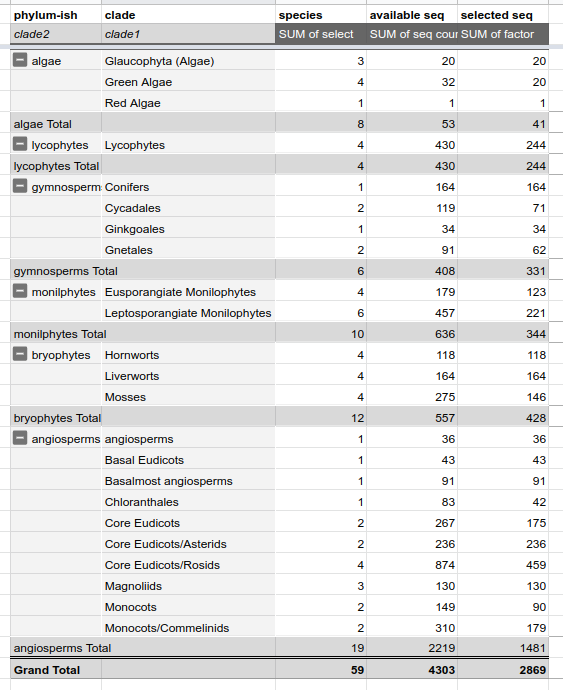

In short, by removing some species from all major clades (but especially angiosperms) I moved from 4303 sequences to 2869 while keeping a reasonable spread over plant phyla.

In selecting I prioritised keeping DNA samples in, and having at least one representative species per clade (clade1).

In total, 59h species are in this reference set.

## 1.2 systematic subsetting.


based on the sheet linked above, I made a new file 1kp_ids_v2.txt.
This file contains all RNA and DNA identifiers from that sheet.

In [27]:
wc -l data/1kP_ids_v2.txt

59 data/1kP_ids_v2.txt


: 1

In [28]:
grep -i -f ./data/1kP_ids_v2.txt data/"$inseq"_linear.fasta -A 1 --no-group-separator > data/"$inseq"_selection-v2.fasta

: 1

In [29]:
grep '>'  data/"$inseq"_selection-v2.fasta -c
wc -l     data/"$inseq"_selection-v2.fasta

2869004l
5738 data/orthogroup_AtLDOX_AT4g22880_selection-v2.fasta


: 1

Now check if all species IDs are present:

In [30]:
while read line
do   count=$(grep "$line" -c  data/"$inseq"_selection-v2.fasta )
     echo -e "$line\t$count"
done < data/1kP_ids_v2.txt 


>AALA	43
>ABSS	41
>AKXB	21
>ALVQ	43
>BMJR	28
>BNCU	52
>BSNI	28
>CAPN	27
>CBAE	65
>CVEG	26
>ENQF	54
>GJPF	47
>GOWD	25
>GTHK	37
>HPXA	50
>JKHA	5
>JVBR	43
>JVSZ	31
>MEKP	55
>MUNP	29
>OSHQ	42
>PIVW	29
>POOW	7
>PQED	8
>QVMR	22
>RCBT	38
>RSOF	1
>SGTW	34
>TCBC	23
>TFYI	26
>UHLI	33
>UPMJ	56
>UUHD	36
>VDAO	25
>VIBO	52
>WBOD	60
>WLIC	39
>XZUY	32
>ZFRE	46
>ZXJO	31
>Ambtr	91
>Arath	87
>Betvu	96
>Chlre	2
>Chlva	5
>Klefl	4
>Micpu	9
>Mimgu	86
>Nelnu	79
>Orysa	86
>Pinta	164
>Poptr	131
>Selmo	69
>Solly	150
>Sorbi	93
>Spipo	36
>Theca	105
>Vitvi	136
>Phypa	50


: 1

### concluding
Great, we have a succesfully reduced the input by 1500-ish sequences and double checked that all species IDs came across as intended. Now move on the adding guide and Azolla sequences.

## 1.3 add guide sequences

### now actually working on the guide sequences:
linearise:

In [34]:
cat data/guide-sequences-v4.fasta \
  | awk '/^>/ {printf("%s%s\n",(N>0?"\n":""),$0);N++;next;} {printf("%s",$0);} END {printf("\n");}' \
  > data/guide-sequences-v4_linear.fasta

: 1

And the Azolla filiculoides sequences:

In [50]:
cat data/ANS-likes_Azolla-filiculoides_v4.fasta \
  | awk '/^>/ {printf("%s%s\n",(N>0?"\n":""),$0);N++;next;} {printf("%s",$0);} END {printf("\n");}' \
  > data/ANS-likes_Azolla-filiculoides_v4_linear.fasta

: 1

now combine

1. outgroup yeast
2. outgroup human
3. Azfi sequences
4. guide sequences
5. orthogroup

In [2]:
cat data/ANS-likes_Azolla-filiculoides_v4_linear.fasta \
    data/guide-sequences-v4_linear.fasta               \
    data/"$inseq"_selection-v2.fasta                   \
> data/"$inseq"_selection-v2_guide-v5.fasta

In [3]:
head data/"$inseq"_selection-v2_guide-v5.fasta
tail data/"$inseq"_selection-v2_guide-v5.fasta

>Azfi_s0092.g043107
MADTCTPTTTLVATSNTKIQSIKELVDAGLCHVPSIYIRPPNERPNFQLDVNSTVECENIPIISFANMFGHNREHIVEQVRHACLDWGVFQVTNHCVPTDVVTKIWTVTSEFFALPTSEKVSFNSNDPSFPMYFFTGFYRDERIREWKDTLGFKPSSITDTNLIPTFLRDPMLNFYTDTKNLAHLVGELVALSLGIDTTVLHKHFSRQTIGMNYYPTCPQPDLAFGLSSHSDFGSITLLMQDAEGLQVKKGDEWVNVKVIPNSFIVLIGDQLEILTNGHYKSVEHRVLTNTNKPRMSIGCFFGPHDSDKIGPIDKFISDDKPTVYKETMFGDYLKHGFGKELNGKSNLEFSIRRHTNVK
>Azfi_s0003.g007795
MDCTSEPLPPCLQELVDAGLSSVPSAYIRPPHERFIPPSHDLSSNAAQIPVINHGVPHDVMIEMRASCSRFFQQPPEMRNIYRSQSFDDPLAYSTSFNPAKEKANDWKDVLYVRDFPGNPVDGFGIAPDVCRFHLALFYAFLHFVYSTLGAFQVFRYEVARLAKQLYEAIFEGLGLSSICIEKTLPGIPWLAMCVNYYPRCPDPSITYGSTAHTDGGSLTILLQDDVAGLWIQKKNEWVQVKPLANSFVVNIGDQVEILSNGIYKSIKHTVLTNSERPRMSVACIFGPKEDENIAPIEDLVSEHQPARYKEVRFGDYLANVYNVELAKL
>Azfi_s0005.g009422
MSRAPAFGESGSSGSYFSETGSLLLMLSDNEAPSDRVGLLACLDSGFFYVVNHGIDRDLIQEVLHQSRKFFELPLSEKAKCLRNQNHRGYTPLFDETLDPSRQFQGDSKEGYYIGVEAPKDSHRASLCFYGPNIWPSEDLLPGWRDTMETYHKKTLNVASKICRLIALALNLEPEFFEKTGMMDNPMAFLRLLHYSGEKSIPEKGIFGAGAHSDWGFLTLIICDGTPGLQICRDKDEKSQLWESVEPVEG

In [4]:
grep '>' -c data/"$inseq"_selection-v2_guide-v5.fasta

3020


And reset variable, and check.

In [5]:
# for the selection workflow
inseq="$inseq"_selection-v2_guide-v5
echo $inseq

orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5


In [6]:
head data/$inseq.fasta

>Azfi_s0092.g043107
MADTCTPTTTLVATSNTKIQSIKELVDAGLCHVPSIYIRPPNERPNFQLDVNSTVECENIPIISFANMFGHNREHIVEQVRHACLDWGVFQVTNHCVPTDVVTKIWTVTSEFFALPTSEKVSFNSNDPSFPMYFFTGFYRDERIREWKDTLGFKPSSITDTNLIPTFLRDPMLNFYTDTKNLAHLVGELVALSLGIDTTVLHKHFSRQTIGMNYYPTCPQPDLAFGLSSHSDFGSITLLMQDAEGLQVKKGDEWVNVKVIPNSFIVLIGDQLEILTNGHYKSVEHRVLTNTNKPRMSIGCFFGPHDSDKIGPIDKFISDDKPTVYKETMFGDYLKHGFGKELNGKSNLEFSIRRHTNVK
>Azfi_s0003.g007795
MDCTSEPLPPCLQELVDAGLSSVPSAYIRPPHERFIPPSHDLSSNAAQIPVINHGVPHDVMIEMRASCSRFFQQPPEMRNIYRSQSFDDPLAYSTSFNPAKEKANDWKDVLYVRDFPGNPVDGFGIAPDVCRFHLALFYAFLHFVYSTLGAFQVFRYEVARLAKQLYEAIFEGLGLSSICIEKTLPGIPWLAMCVNYYPRCPDPSITYGSTAHTDGGSLTILLQDDVAGLWIQKKNEWVQVKPLANSFVVNIGDQVEILSNGIYKSIKHTVLTNSERPRMSVACIFGPKEDENIAPIEDLVSEHQPARYKEVRFGDYLANVYNVELAKL
>Azfi_s0005.g009422
MSRAPAFGESGSSGSYFSETGSLLLMLSDNEAPSDRVGLLACLDSGFFYVVNHGIDRDLIQEVLHQSRKFFELPLSEKAKCLRNQNHRGYTPLFDETLDPSRQFQGDSKEGYYIGVEAPKDSHRASLCFYGPNIWPSEDLLPGWRDTMETYHKKTLNVASKICRLIALALNLEPEFFEKTGMMDNPMAFLRLLHYSGEKSIPEKGIFGAGAHSDWGFLTLIICDGTPGLQICRDKDEKSQLWESVEPVEG

# 2. Aligning

Linsi is probably the most acurate mafft setting (as declared by the MAFFT authors). It is turned off by default in normal or auto mafft for alignments bigger than 200 sequences. 
However, reading the manual, einsi should be the better method, at least for gappy allignemnts or allignments with multiple domains.
In this particular case, these two are very similar but I like the einsi allignment a bit better in the gaps.
I assessed this on a big alligment of sel2-g4 with double guide sequences. 
I later removed these and started the process anew.
The "wrong" allignments are removed from the repo, and I'm not re-creating allignments that I actually won't use. 
Hence, here I'm only creating a mafft-einsi alligment. 
Some old alligments are retained in Git history.

In [7]:
inseq=orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5

In [ ]:
rm "./data/alignments_raw/$inseq"_aligned-mafft*
if    [ ! -d ./data/alignments_raw/ ]
then  mkdir  ./data/alignments_raw
fi
prefix=data/alignments_raw/"$inseq"_aligned-mafft-einsi
if    [ ! -f "$prefix".fasta ]
then  einsi --thread $(nproc) data/$inseq.fasta \
            >  "$prefix".fasta \
            2> "$prefix".log
fi

(phyla_ans) (phyla_ans) (phyla_ans) 

In [21]:
tail ./data/alignments_raw/"$inseq"_aligned-*.log

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to insert more gaps into gap-rich regions than previous versions.
To disable this change, add the --leavegappyregion option.

Parameters for the E-INS-i option have been changed in version 7.243 (2015 Jun).
To switch to the old parameters, use --oldgenafpair, instead of --genafpair.

(phyla_ans) 

: 1

In [22]:
ls ./data/alignments_raw/$inseq* -sh

 27M ./data/alignments_raw/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi.fasta
3.6M ./data/alignments_raw/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5_aligned-mafft-einsi.log
(phyla_ans) 

: 1

In [23]:
head ./data/alignments_raw/"$inseq"_aligned-mafft*.fasta

>Azfi_s0092.g043107
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
--------------MADTCT------------------PTTTLVAT--------------
------------------------------------------------------------
------------------------------------------------------------
(phyla_ans) 

: 1

## snapshots of alignment
Done manually with a quick trim.

# 3. Alignment trimming

Odds are, your alignment is quite gappy which may confuse tree building algorithms. Often it is better to remove gappy columns in your alignment. Let's have a look at this with `trimAl`. Short for 'trim alignment' (I guess). No Artificial intelegence stuff going on here.

As always, have a look at the help page.

In [25]:
inseq=orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5

(phyla_ans) 

: 1

## 3.2 Tweak trimming parameters

Alternatively, you may tweak your own trimming parameters like so. 

Everytime I change parameters, I change the variable `$trimappendix` to reflect those changes. Second, I explain briefly in a text cell why I chose to do so.

In [26]:
trimal -h


trimAl v1.4.rev15 build[2013-12-17]. 2009-2013. Salvador Capella-Gutierrez and Toni Gabaldón.

trimAl webpage: http://trimal.cgenomics.org

This program is free software: you can redistribute it and/or modify 
it under the terms of the GNU General Public License as published by 
the Free Software Foundation, the last available version.

Please cite:
		trimAl: a tool for automated alignment trimming in large-scale phylogenetic analyses.
		Salvador Capella-Gutierrez; Jose M. Silla-Martinez; Toni Gabaldon.
		Bioinformatics 2009, 25:1972-1973.

Basic usage
	trimal -in <inputfile> -out <outputfile> -(other options).

Common options (for a complete list please see the User Guide or visit http://trimal.cgenomics.org):

    -h                       Print this information and show some examples.
    --version                Print the trimAl version.

    -in <inputfile>          Input file in several formats (clustal, fasta, NBRF/PIR, nexus, phylip3.2, phylip).

    -compareset <inputfile>  In


9) Selection of sequences to be deleted from the alignment. Start in 0

   trimal -in <inputfile> -out <outputfile> -selectseqs { 2,4,8-12 } 

10) Select the 5 most representative sequences from the alignment

   trimal -in <inputfile> -out <outputfile> -clusters 5 

(phyla_ans) 

: 1

#### gap threshold

This is a somewhat overdone parallel loop/function to run trimal with various settings and get some numbers out of it.

In [76]:
dir=data/alignments_trimmed
if    [ ! -d "$dir" ]
then  mkdir  "$dir"
fi
#rm $dir/allignment_dimensions.tab
#rm $dir/allignment_gap-freq.tab 
CPU=$(nproc)

# set arrays to itterate over
allignments=(data/alignments_raw/"$inseq"_aligned*einsi*.fasta)
gt=( 02 04 06 08 10 20 30 40 50 60 70 80 90 )
res=1 # kept for compatibility
seq=1 # kept for compatibility

# export trimAL function so parallel can find it
function trimAL {
  # actually run trimAL for this allignment and settings combo
  trimappendix=trim-gt"$2"
  echo $trimappendix
  appendix=$(echo $1 | cut -d '/' -f 3- | sed "s/$6\_//" | sed "s/.fasta//")
  out="$5"/"$6"_"$appendix"_"$trimappendix"
  if   [ ! -f "$out".fasta ]
  then trimal -in  $1           \
              -out "$out".fasta \
              -gt  .$2          \
              >  $out.std       \
              2> $out.err
  fi
  # this takes a lot of space: make a png snapshot of every allignment
  if    [ ! -f $prefix.png ]
  then  jalview -nodisplay       \
                -open $out.fasta \
                -colour CLUSTAL  \
                -png  $out.png > /dev/null 2> /dev/null 
  fi

  # determine the allignment width and length for each allignment
  if   [ -f "$out".fasta ]
  then width=$(head -n 100 "$out".fasta                                                                     \
               | awk '/^>/ {printf("%s%s\n",(N>0?"\n":""),$0);N++;next;} {printf($0);} END {printf("\n");}' \
               | head -n 2  \
               | tail -n 1  \
               | wc -c)
       length=$(grep '>' -c "$out".fasta )
       tab_ID=$(echo -e "$6\t$appendix\t$2\t$3\t$4")
       echo -e "$tab_ID\twidth\t$width"   >> $5/allignment_dimensions.tab
       echo -e "$tab_ID\tlength\t$length" >> $5/allignment_dimensions.tab
    
       # determine the gaps per sequence in this alligmnent and store it in a table.
       while read line
       do    echo $line            \
             | sed -E 's/[A-Z]//g' \
             | wc -c
       done < <(cat "$out".fasta                                                                             \
                | awk '/^>/ {printf("%s%s\n",(N>0?"\n":""),$0);N++;next;} {printf($0);} END {printf("\n");}' \
                | grep -v '>'
                )                         \
        | sed "s/^/$tab_ID/g" >> $5/allignment_gap-freq.tab 
   fi
}
export -f trimAL

# run the trimAL sessions in parallel
parallel -j "$CPU" trimAL {1} {2} {3} {4} {5} {6}   \
         ::: ${allignments[@]}                      \
         ::: ${gt[@]}                               \
         ::: ${res[@]}                              \
         ::: ${seq[@]}                              \
         ::: "$dir"                                 \
         ::: "$inseq"

(phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) trim-gt80
trim-gt70
trim-gt40
trim-gt60
trim-gt50
trim-gt10
trim-gt20
trim-gt30
trim-gt08
trim-gt06
trim-gt04
trim-gt02
trim-gt90
(phyla_ans) 

: 1

In [31]:
cut -f 3,6- data/alignments_trimmed/allignment_dimensions.tab | grep width | sort -k1n


02	width	557
04	width	468
06	width	433
08	width	403
10	width	382
20	width	354
30	width	346
40	width	337
50	width	324
60	width	294
70	width	276
80	width	185
(phyla_ans) 

: 1

Based on the snapshots of the alignments, I'm going with gap threshold 30 %

#### seq content

In [64]:
#rm data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v2_guide-v5*

(phyla_ans) 

: 1

In [66]:
dir=data/alignments_trimmed
if    [ ! -d "$dir" ]
then  mkdir  "$dir"
fi

CPU=$(nproc)

# set arrays to itterate over
allignments=data/alignments_raw/"$inseq"_aligned*einsi*.fasta
gt=( 3 )
res=( .1 .3 .5 .7 .9 .95 .97 .98 .99 )
seq=( 10 30 50 70 90  95  97  98  99 )


# export trimAL function so parallel can find it
function trimAL {
  # actually run trimAL for this allignment and settings combo
  trimappendix=trim-gt"$2"-res"$3"-seq"$4"
  echo $trimappendix
  appendix=$(echo $1 | cut -d '/' -f 3- | sed "s/$6\_//" | sed "s/.fasta//")
  out="$5"/"$6"_"$appendix"_"$trimappendix"
  if   [ ! -f "$out".fasta ]
  then trimal -in  $1           \
              -out "$out".fasta \
              -resoverlap $3    \
              -seqoverlap $4    \
              -gt  .$2          \
              >  $out.std       \
              2> $out.err
  fi
  # this takes a lot of space: make a png snapshot of every allignment
  if    [ ! -f $prefix.png ]
  then  jalview -nodisplay \
                -open $out.fasta \
                -colour CLUSTAL \
                -png  $out.png > /dev/null 2> /dev/null 
  fi

  # determine the allignment width and length for each allignment
  if   [ -f "$out".fasta ]
  then width=$(head -n 100 "$out".fasta                                                                     \
               | awk '/^>/ {printf("%s%s\n",(N>0?"\n":""),$0);N++;next;} {printf($0);} END {printf("\n");}' \
               | head -n 2  \
               | tail -n 1  \
               | wc -c)
       length=$(grep '>' -c "$out".fasta )
       tab_ID=$(echo -e "$6\t$appendix\t$2\t$3\t$4")
       echo -e "$tab_ID\twidth\t$width"   >> $5/allignment_dimensions.tab
       echo -e "$tab_ID\tlength\t$length" >> $5/allignment_dimensions.tab
    
       # determine the gaps per sequence in this alligmnent and store it in a table.
       while read line
       do    echo $line            \
             | sed -E 's/[A-Z]//g' \
             | wc -c
       done < <(cat "$out".fasta                                                                             \
                | awk '/^>/ {printf("%s%s\n",(N>0?"\n":""),$0);N++;next;} {printf($0);} END {printf("\n");}' \
                | grep -v '>'
                )                         \
        | sed "s/^/$tab_ID/g" >> $5/allignment_gap-freq.tab 
   fi
}
export -f trimAL
# run the trimAL sessions in parallel
parallel -j "$CPU" trimAL {1} {2} {3} {4} {5} {6} \
         ::: ${allignments[@]}                      \
         ::: ${gt[@]}                               \
         ::: ${res[@]}                              \
         ::: ${seq[@]}                              \
         ::: "$dir"                                 \
         ::: "$inseq"

(phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) (phyla_ans) 

In [ ]:
ls data/alignments_trimmed/$inseq*einsi* -sh

In [ ]:
ls data/alignments_trimmed/*.png -sh

# 4. Fast tree building
Here we'll make fast trees: not acurate, no bootstraps, but fast. This gives us an idea of the output and how we will process it. Building 'propper' trees can take days sometimes weeks, so it's better to be sure you have all sequences in there you want before you start. 

I use two ways to make thise fast trees, first with a program called `fasttree` and second with the programm `iqtree` with the `-fast` parameter. My gut feeling is that the latter is a bit more acurate but takes a couple of minutes. Fasttree takes seconds.

I arbitrarily consider trees to be analyses and not data, hence I store these in the `analyses` directory.

Since these trees run fast (just take a second to consider how rediculous that sounds) I propose to run these in loops again, taking all the trimmed alignments that were made earlier. The trees run in parallel on one CPU. If you're running many trees (way more than you have computing cores) then don't run these in the background. Practically, that means removing the `&` character almost at the end of the loop.

## 4.2 IQtree -fast

And here is the same but for running iqtree. I picked some random model here, but substitute it by anything you like better or have good experience with it the past.

In [ ]:
#for a in data/alignments_trimmed/"$inseq"_aligned*.fasta
conda activate phylogenetics
for a in data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90.fasta
do  echo "making a iqtree fast tree of file $a"
    appendix=$(echo $a | cut -d '/' -f 3- | sed "s/$inseq\_//" | sed "s/.fasta//")
    echo $appendix
    if   [ ! -d   analyses/"$inseq"_fasttrees/"$appendix" ]
    then mkdir -p analyses/"$inseq"_fasttrees/"$appendix"
    fi
    
    iqprefix=analyses/"$inseq"_fasttrees/"$appendix"/"$inseq"_"$appendix"_iqtree-fast
    if   [ ! -f "$iqprefix".iqtree ]
    then nice iqtree -s $a -fast \
                     -m 'LG+R7' \
                     -pre "$iqprefix" \
                     > "$iqprefix".stdout \
                     2> "$iqprefix".stderr &
    fi
done
wait
conda deactivate

(phylogenetics) making a iqtree fast tree of file data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90.fasta
aligned-mafft_trim-gt4-seq95-res90
[1] 584995
(phylogenetics) 

## 4.3 Visualise your fast trees. 

To visualise your trees, you perhaps already have something installed like mega, seaview, etc. Otherwise you can upload the tree file to [iToL](https://itol.embl.de/) (my prefered method) or any other website that visualises trees. See section 6 for uploading your trees to iToL.

Alternativelly, we can try to get a quick snapshot here in the notebook:

### conclusions

A first fast-tree shows us plenty of interesting stuff already:
ANS and FLS cluster together, and distincly from F3H. 
There's however, a bunch of other clear groups that remain uncharacterised. 
To remidy this, Erbil has provided a new set of guide sequences to better illustratie the evolution of this big family of genes. 
I'm leaving the UFBootstrap run on for now, to confirm the fasttree results, but then I'll move on to a version with guide-2. 
The iq-fast-tree is online [here](https://itol.embl.de/tree/9421021579222211612506891) and looks like  this:

![](analyses/orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_fasttrees/aligned-mafft_trim-gt4-seq95-res90/orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90_iqtree-fast.svg)

# 5. Building trees with IQtree 

Finally, we're at the stage to build propper maximum likelyhood phylogenetic trees! Based on your previous results, you should have one or two trimmed alignments you want to make a tree of. There is several choices to make still: a model of evolution and a bootstrapping method.

**modelfinder**

IQtree is a state-of-the art tree buildling program, which has a model finder algorithm included! This can take a couple of hours, so be sure to do this only once. There is two model finder options, a quick one with some often used models: `-m TEST` or an extended modelfinder, using more models of evolution and substitution: `-m MFP`. I recommend the latter. Once you have your best-fit model (for example: 'LG+R7') then use this model when you build more trees from the same alignment: `-m 'LG+R7'`

**bootstrapping**

Normal or 'non-parametric' bootstrapping can take quite a long time; I have had trees running for weeks. Hence there is alternatives that are a lot faster but might over or underestimate the bootstrap values if your alignment doesn't fit your model well. To use 'normal bootstraps' the minimum is 100. That's why I like to to 200 to be safe, by adding the option `-b 200`.

Alternativelly, there is the 'ultrafast bootstrap' option in IQtree. The minumum for this is 1000 bootstraps, so I'd like to do double by including the parameter: `-bb 2000`. Additionally, I highly recommend also running the approximate likelyhood ratio test for 2000 bootstraps at the same time by including parameters `-alrt 2000`. This adds a minimal amount of run time and makes interpretation of your tree a lot more reliable.

As the [IQtree FAQ](http://www.iqtree.org/doc/Frequently-Asked-Questions#how-do-i-interpret-ultrafast-bootstrap-ufboot-support-values) says: typically you start believing a clade when the ultra fast bootstraps => 95 and alrt => 80. Interpretation of these values is not linear like 'normal' bootstrap, hence if you lower the threshold of ultrafast bootstraps to 90, you will likely enormously overestimate your results. 

**other command-line options**

In the commandline I wrote below, I instruct iqtree to use no more CPU cores than your computer has, but also to find the optimum amount of cores (more is not always better). Second, a prefix is defined to store the different trees that IQtree wil make.

**More info**
* iqtree tutorial: http://www.iqtree.org/doc/Tutorial
* aLRT: https://www.ncbi.nlm.nih.gov/pubmed/16785212





## running IQtree

Now these are all trimmed alignments you have available. 
Choose one to start with (based on your fasttrees or inspections of your alignments).

Make sure that 
1. the path to this alignment is the variable `$a` 
2. you choose an appendix based on your iqtree settings

In [ ]:
ls data/alignments_trimmed/"$inseq"_aligned*fasta

In [ ]:
a=data/alignments_trimmed/orthogroup_AtLDOX_AT4g22880_selection-v1_guide-v1_aligned-mafft_trim-gt4-seq95-res90.fasta

#iqpendix='iqtree-b200'
iqpendix='iqtree-bb2000-alrt2000'

echo "making a tree of file $a"
echo "The first lines of alignment $a look like this"
head $a

file_appendix=$(echo $a | cut -d '/' -f 3- | sed "s/$inseq\_//" | sed "s/.fasta//")
echo "Making a directory $file_appendix to store trees (name based on alignment filename)"

if   [ ! -d    analyses/"$inseq"_trees/"$file_appendix" ]
then mkdir -p  analyses/"$inseq"_trees/"$file_appendix" 
fi

iqprefix=analyses/"$inseq"_trees/"$file_appendix"/"$inseq"_"$file_appendix"_"$iqpendix"
if   [ ! -f "$iqprefix".tree ]
then nice iqtree -s $a \
                 -m MFP \
                 -bb 2000 \
                 -alrt 2000 \
                 -nt AUTO \
                 -ntmax $(nproc)  \
                 -pre  "$iqprefix" \
                 2>   "$iqprefix".stderr \
                 >    "$iqprefix".stdout \
                 && cat "$iqprefix".out | mail -s ANS_IQtree_run laura.w.dijkhuizen@gmail.com
fi

In [ ]:
ls $iqprefix* -1

You can have a look at the last lines of your log file like this:

In [ ]:
tail -n 40 $iqprefix.log

Are you content with your tree? Great news! If you want to do another run, I recommend copying the cell above and editing the copy. That way you keep the code for all trees you made. Don't forget to explain what you observed, why you're making a new tree, and what you're changing (remember this is your labjournal). 

# tree storage

For tree storage and sharing, I have yet to encounter a better tool than EMBLs [iToL](https://itol.embl.de/). It's a great interface for exploring and sharing trees with colleagues. You can browse to the treefile IQtree created on your computer and upload it to iToL. Alternativelly, you can copy paste the contents of the file to iToL. Make sure to keep the original filename as well! This file name now contains a brief summary of how this tree was made.

## conclusion
preliminary: A tree like this, although it takes a while to calculate, succedes in categorising Azolla ANS-like sequences into specific groups of this big DOX gene family. 
However, propper labels for certain groups are still missing, to addres this I'll implement Erbils second version of the ANS guide sequences. Additionally, I may find some zea mays, arabidopsis sequences in the different groups.

There's distinct clades, often with members of all big plant groups, but the speciation pattern isn't always nice. To conclude about the evolution of any one clade internally, a separate tree of only that clade should be made with dedicated re-alignment and tree inference.